In [50]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.segmentation as seg
from skimage import io, color,transform
import matplotlib.path as plt_path
import cv2
import math

In [3]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6, 6))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

In [233]:
image_cv2 = cv2.imread('out_1.png',cv2.IMREAD_UNCHANGED)
image_cv2 = cv2.resize(image_cv2,(512,512))

cv2.imwrite('imgs/ed.png', image_cv2)

image_rgba = io.imread('imgs/ed.png')
# image = transform.resize(image,(512,512))
print(image_rgba.shape)
image_gray = color.rgb2gray(color.rgba2rgb(image_rgba))


(512, 512, 4)


In [137]:
def ellipse_points(resolution:int, center:tuple, x_rad:int, y_rad:int) -> tuple:
    t = np.linspace(0, 2*math.pi, resolution)
    x = center[0] + x_rad*np.cos(t)
    y = center[1] + y_rad*np.sin(t)

    res = np.array([x, y]).T
    
    # Exclude last point because a closed path should not have duplicate points
    return res[:-1]

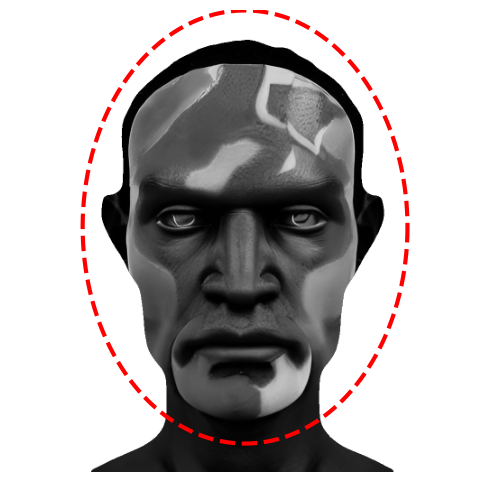

In [234]:

# image_center = (int(image.shape[0]/2), int(image.shape[1]/2))
# x_offset = 0
# y_offset = 0.08 * image.shape[1]
# x_rad = image.shape[0]*0.26
# y_rad = image.shape[1]*0.3

# points = ellipse_points(400, (image_center[0] + x_offset, image_center[1] - y_offset), x_rad, y_rad )

# s = np.linspace(0, 2*np.pi, 800)
# r = 200 + 140*np.sin(s)
# c = 260 + 130*np.cos(s)
# points = np.array([r, c]).T

# s = np.linspace(0, 2*np.pi, 800)
# r = 280 + 180*np.sin(s)
# c = 260 + 130*np.cos(s)
# points = np.array([r, c]).T   #nafees

s = np.linspace(0, 2*np.pi, 800)
r = 240 + 240*np.sin(s)
c = 260 + 180*np.cos(s)
points = np.array([r, c]).T   #1



fig, ax = image_show(image_gray)
ax.plot(points[:, 1], points[:, 0], '--r', lw=3)


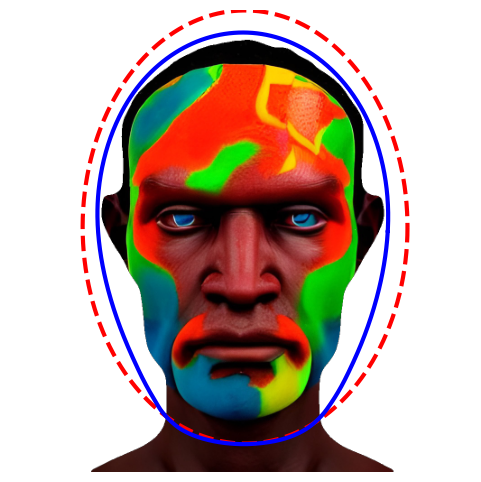

In [236]:
# beta = 5 #contour smoothness factor
# alpha = 0.1 #contour contraction speed factor
beta = 50
alpha = 0.001

snake = seg.active_contour(image_gray, points, alpha=alpha, beta=beta, gamma=0.001)

fig, ax = image_show(image_rgba)
ax.plot(points[:, 1], points[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)

In [237]:
print(snake.shape)

path = plt_path.Path(snake)
path.contains_points(np.array([[0,2,4,240,230],[0,5,3,200,300]]).T)

coords = np.zeros((image_gray.size,2))
for j in range(image_gray.shape[1]):
    for i in range(image_gray.shape[0]):
        coords[i+j*image_gray.shape[0]][0] = i
        coords[i+j*image_gray.shape[0]][1] = j

bool_array = path.contains_points(coords)

(800, 2)


In [238]:
png = np.copy(image_rgba)
for j in range(png.shape[1]):
    for i in range(png.shape[0]):
        if bool_array[i+j*png.shape[0]] ==  False:
            png[i,j,3] = 0
        

(<Figure size 600x600 with 1 Axes>, <AxesSubplot:>)

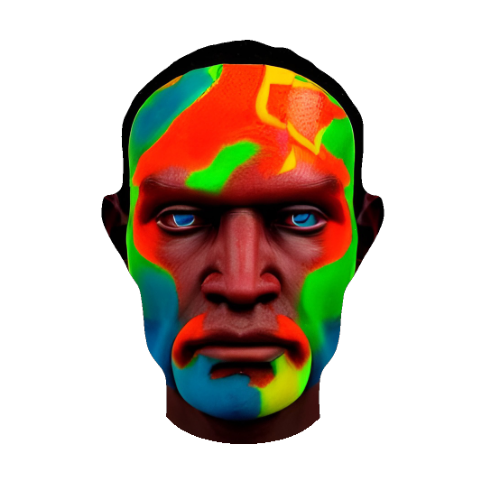

In [239]:
image_show(png)